# Enunciado

### Columnas

- **ID**: Identificador único.  

- **RevolvingUtilizationOfUnsecuredLines**: Proporción del límite de crédito utilizado.  

- **Age**: Edad del individuo.  

- **NumberOfTime30-59DaysPastDueNotWorse**: Número de retrasos de pago de 30 a 59 días.

- **DebtRatio**: Ratio deuda-ingreso.

- **MonthlyIncome**: Ingreso mensual.

- **NumberOfOpenCreditLinesAndLoans**: Número de líneas de crédito abiertas y préstamos.

- **NumberOfTimes90DaysLate**: Número de retrasos de pago de 90 días o más.

- **NumberRealEstateLoansOrLines**: Número de préstamos o líneas de crédito respaldados por propiedades inmuebles.

- **NumberOfTime60-89DaysPastDueNotWorse**: Número de retrasos de pago de 60 a 89 días.

- **NumberOfDependents**: Número de dependientes.

- **SeriousDlqin2yrs**: Incumplimiento grave en los últimos 2 años (1 si ocurrió, 0 en caso contrario)

# Bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score

# Leer DataSet

In [311]:
data = pd.read_csv("../¡EnseñameLaPasta!/train.csv")

In [312]:
data

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,9580,0.668999,58,2,0.449504,3425.0,9,1,1,1,1.0,0
1,39755,0.015922,71,0,6.000000,NaN,5,0,0,0,0.0,0
2,118799,0.183062,52,1,0.035593,5000.0,9,0,0,0,0.0,0
3,16489,0.162301,77,0,0.227886,2000.0,8,0,0,0,0.0,0
4,149857,0.404199,30,0,0.026010,5843.0,4,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
104995,79500,0.842886,33,0,0.182561,9300.0,10,0,0,0,1.0,0
104996,84928,0.805186,68,0,0.229466,5429.0,7,0,0,0,0.0,0
104997,56301,0.811494,51,2,3.709314,3016.0,26,0,4,0,0.0,1
104998,41912,0.412590,62,1,0.173290,14166.0,7,1,1,0,0.0,0


In [215]:
len(data)

105000

In [314]:
data_test = pd.read_csv("../¡EnseñameLaPasta!/test.csv")

In [315]:
data_test

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,129460,1.000000,21,0,8.000000,NaN,0,0,0,0,NaN
1,134018,0.009878,38,0,0.229978,10500.0,10,0,1,0,1.0
2,86523,0.276836,70,0,1914.000000,NaN,23,0,1,0,0.0
3,138466,0.045413,75,0,452.000000,NaN,4,0,0,0,0.0
4,143905,0.000000,82,0,0.000000,NaN,5,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
44995,124596,0.055997,70,0,51.000000,NaN,2,0,0,0,0.0
44996,75895,1.000000,62,0,2796.000000,NaN,5,0,1,0,3.0
44997,92453,0.673065,56,1,0.511132,7500.0,9,0,2,0,4.0
44998,139288,1.000000,22,0,0.000000,2500.0,0,0,0,0,0.0


In [217]:
len(data_test)

45000

## ¿Hay null values?

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    105000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  105000 non-null  float64
 2   Age                                   105000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  105000 non-null  int64  
 4   DebtRatio                             105000 non-null  float64
 5   MonthlyIncome                         84164 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       105000 non-null  int64  
 7   NumberOfTimes90DaysLate               105000 non-null  int64  
 8   NumberRealEstateLoansOrLines          105000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  105000 non-null  int64  
 10  NumberOfDependents                    102236 non-null  float64
 11  

## Rellenarlos con la mediana

In [253]:
data.loc[:, 'MonthlyIncome'] = data['MonthlyIncome'].fillna(data['MonthlyIncome'].median())
data.loc[:, 'NumberOfDependents'] = data['NumberOfDependents'].fillna(0)

In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    105000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  105000 non-null  float64
 2   Age                                   105000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  105000 non-null  int64  
 4   DebtRatio                             105000 non-null  float64
 5   MonthlyIncome                         105000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       105000 non-null  int64  
 7   NumberOfTimes90DaysLate               105000 non-null  int64  
 8   NumberRealEstateLoansOrLines          105000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  105000 non-null  int64  
 10  NumberOfDependents                    105000 non-null  float64
 11  

In [221]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    45000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  45000 non-null  float64
 2   Age                                   45000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  45000 non-null  int64  
 4   DebtRatio                             45000 non-null  float64
 5   MonthlyIncome                         36105 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       45000 non-null  int64  
 7   NumberOfTimes90DaysLate               45000 non-null  int64  
 8   NumberRealEstateLoansOrLines          45000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  45000 non-null  int64  
 10  NumberOfDependents                    43840 non-null  float64
dtypes: float64(4), 

In [254]:
data_test.loc[:, 'MonthlyIncome'] = data_test['MonthlyIncome'].fillna(data_test['MonthlyIncome'].median())
data_test.loc[:, 'NumberOfDependents'] = data_test['NumberOfDependents'].fillna(0)

In [223]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    45000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  45000 non-null  float64
 2   Age                                   45000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  45000 non-null  int64  
 4   DebtRatio                             45000 non-null  float64
 5   MonthlyIncome                         45000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       45000 non-null  int64  
 7   NumberOfTimes90DaysLate               45000 non-null  int64  
 8   NumberRealEstateLoansOrLines          45000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  45000 non-null  int64  
 10  NumberOfDependents                    45000 non-null  float64
dtypes: float64(4), 

In [224]:
list(data.columns)

['ID',
 'RevolvingUtilizationOfUnsecuredLines',
 'Age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'SeriousDlqin2yrs']

In [225]:
data.describe()

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
count,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,1.050000e+05,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000
mean,75006.458152,5.378324,52.325610,0.409352,352.044192,6.444949e+03,8.459952,0.254619,1.019010,0.228762,0.737981,0.066514
std,43315.742022,201.573457,14.766425,4.056717,1820.229318,1.453363e+04,5.134329,4.032506,1.131065,4.017864,1.107165,0.249180
min,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37590.750000,0.029974,41.000000,0.000000,0.174950,3.900000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74941.500000,0.154252,52.000000,0.000000,0.366061,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,112542.500000,0.556035,63.000000,0.000000,0.870083,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,149999.000000,29110.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000,1.000000


<Axes: >

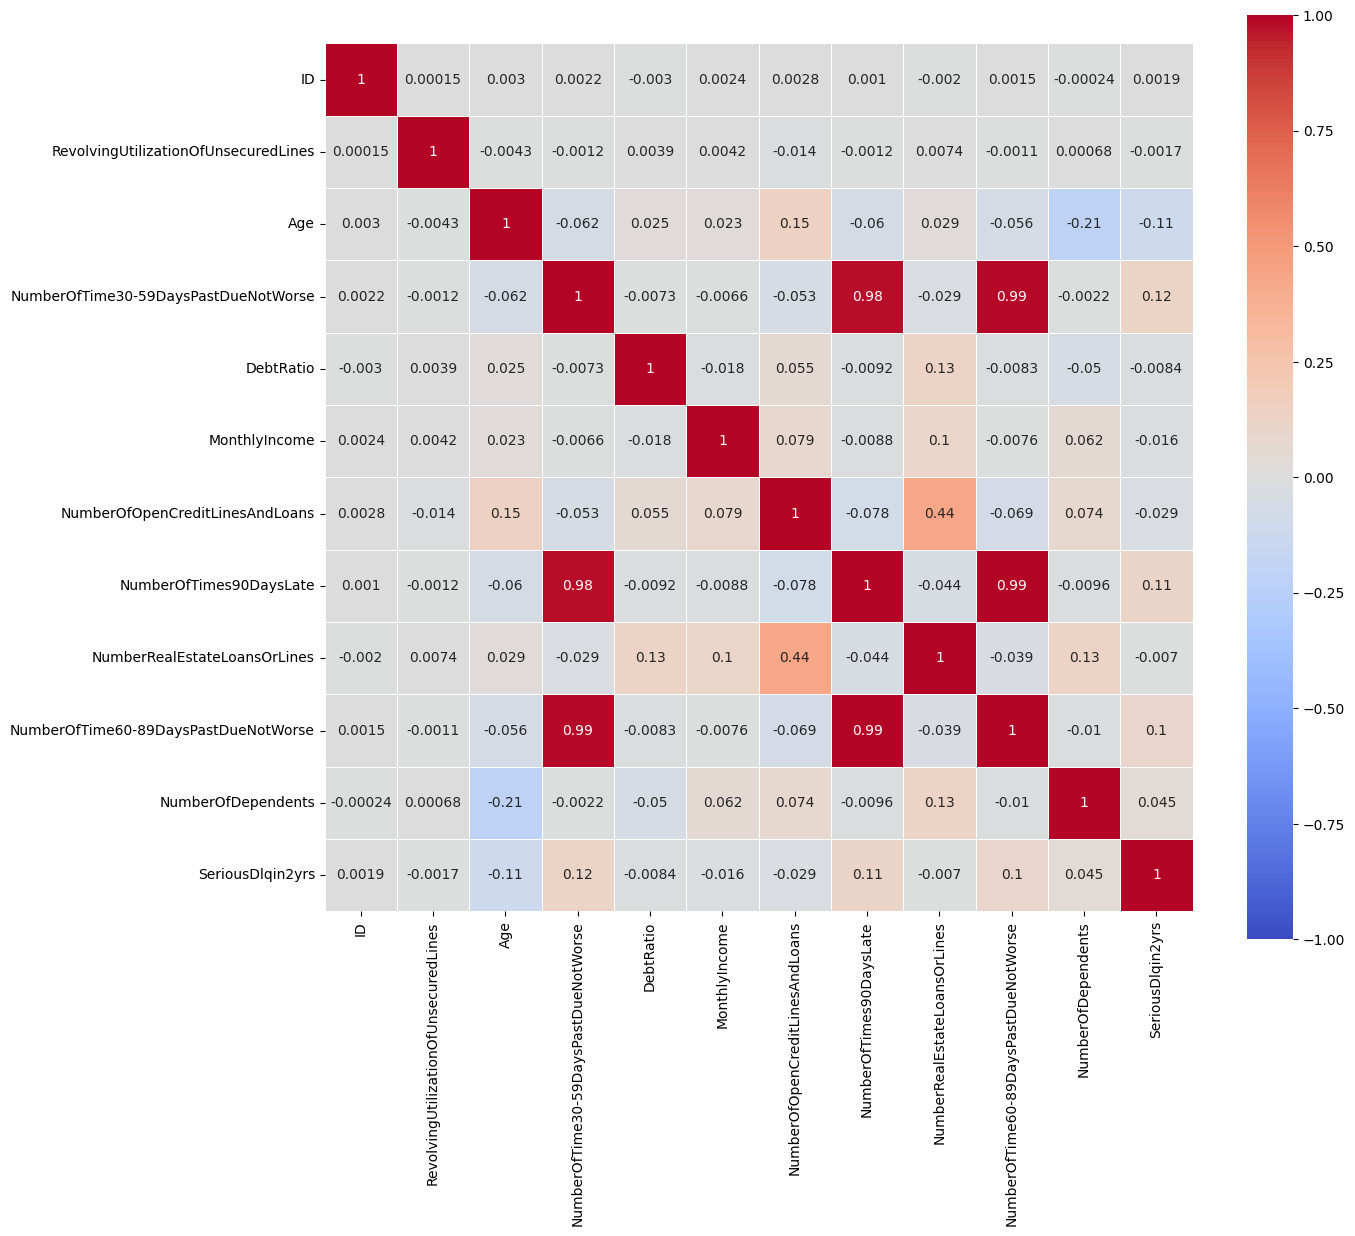

In [226]:
plt.figure(figsize=(14, 12))
sns.heatmap(data.corr(), 
            annot=True,           
            cmap="coolwarm",     
            vmin=-1, vmax=1,      
            square=True,          
            linewidths=0.5)

## Hay pocas correlaciones

# Modelo 1: Regresion Logística


In [227]:
X = data[["NumberOfTime60-89DaysPastDueNotWorse","NumberOfTime30-59DaysPastDueNotWorse","NumberOfTimes90DaysLate"]]
y = data["SeriousDlqin2yrs"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

AUC: 0.6386132006610945


In [228]:
y_pred_proba

array([0.05320748, 0.05320748, 0.05320748, ..., 0.05320748, 0.05320748,
       0.05320748])

In [ ]:
X = data_test[["NumberOfTime60-89DaysPastDueNotWorse", "NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTimes90DaysLate"]]

y_pred_proba_test = model.predict_proba(X)[:, 1] 

predictions_df = pd.DataFrame({"ID": data_test["ID"],
                               "SeriousDlqin2yrs": y_pred_proba_test})

predictions_df.to_csv('Pruebas/predicciones_1.csv', index=False)

# Modelo 2: Regresion logística con featureEngenering



In [ ]:
#MinMaxSCaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [316]:
data = pd.read_csv("../¡EnseñameLaPasta!/train.csv")
data_test = pd.read_csv("../¡EnseñameLaPasta!/test.csv")

data.loc[:, 'MonthlyIncome'] = data['MonthlyIncome'].fillna(data['MonthlyIncome'].median())
data.loc[:, 'NumberOfDependents'] = data['NumberOfDependents'].fillna(0)

data_test.loc[:, 'MonthlyIncome'] = data_test['MonthlyIncome'].fillna(data_test['MonthlyIncome'].median())
data_test.loc[:, 'NumberOfDependents'] = data_test['NumberOfDependents'].fillna(0)


#Creacion de Deuda alta apartir de: 0.5 (significa que tus ingresos estan destinados a deuda, es una situacion financiera dificil)

data['HighDebt'] = data['DebtRatio'] > 0.5

data[['Age', 'MonthlyIncome', 'DebtRatio']] = scaler.fit_transform(data[['Age', 'MonthlyIncome', 'DebtRatio']])

data_test['HighDebt'] = data_test['DebtRatio'] > 0.5
data_test[['Age', 'MonthlyIncome', 'DebtRatio']] = scaler.fit_transform(data_test[['Age', 'MonthlyIncome', 'DebtRatio']])

#scaler ayuda alos modelos de standarizacion y regresion logística.

print(len(data))
print(len(data_test))

105000
45000


<Axes: >

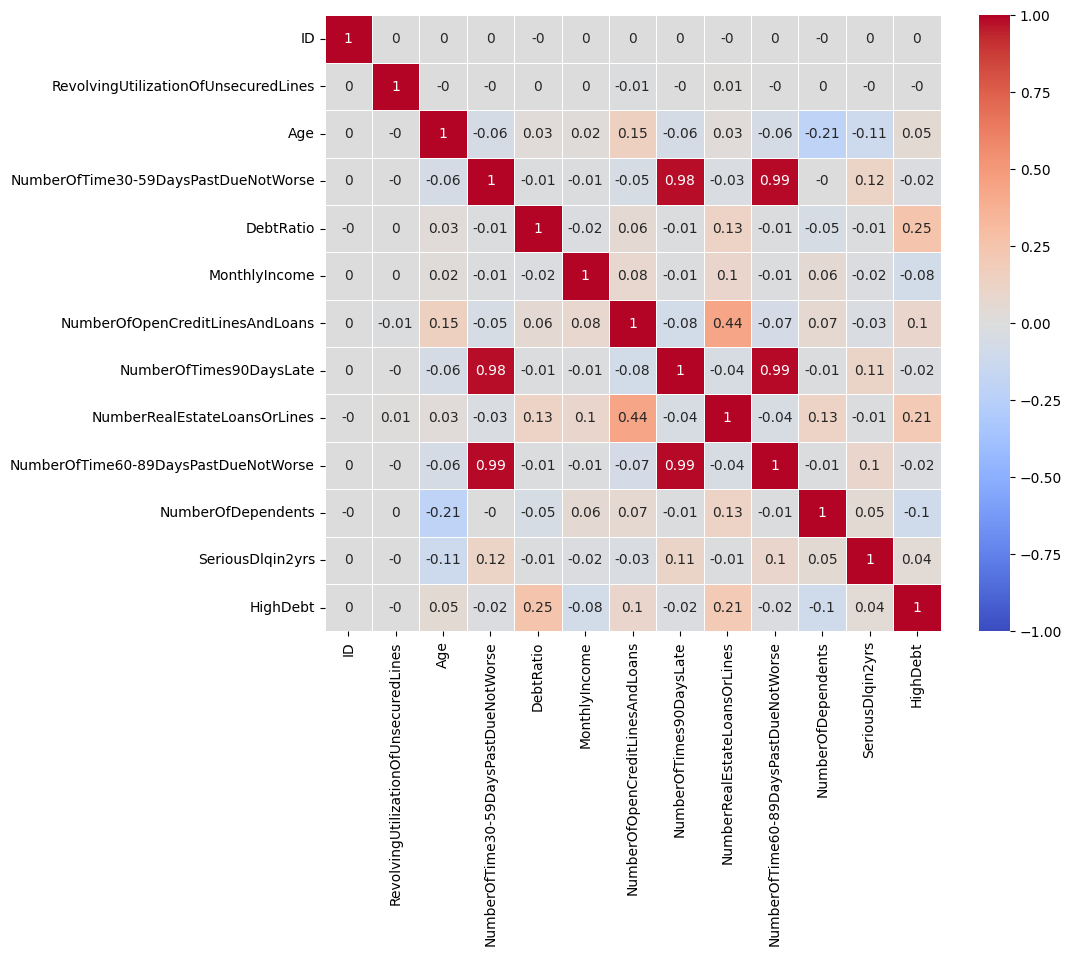

In [320]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr().round(2), 
            annot=True,           
            cmap="coolwarm",     
            vmin=-1, vmax=1,      
            square=True,          
            linewidths=0.5)

### Cogiendo todas las variables

In [196]:
X = data.drop(['ID', 'SeriousDlqin2yrs'], axis=1)
y = data['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [197]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

AUC: 0.6855653035609255


In [198]:
X = data_test.drop(['ID'], axis=1)
y_pred_proba_test = model.predict_proba(X)[:, 1] 

predictions_df = pd.DataFrame({"ID": data_test["ID"],
                               "SeriousDlqin2yrs": y_pred_proba_test})

predictions_df.to_csv('Pruebas/predicciones_2.csv', index=False)

# Modelo 3: Regresion logistica con menos variables (spoiler: funciona peor)


In [199]:
data = pd.read_csv("../¡EnseñameLaPasta!/train.csv")
data_test = pd.read_csv("../¡EnseñameLaPasta!/test.csv")

data.loc[:, 'MonthlyIncome'] = data['MonthlyIncome'].fillna(data['MonthlyIncome'].median())
data.loc[:, 'NumberOfDependents'] = data['NumberOfDependents'].fillna(0)

data_test.loc[:, 'MonthlyIncome'] = data_test['MonthlyIncome'].fillna(data_test['MonthlyIncome'].median())
data_test.loc[:, 'NumberOfDependents'] = data_test['NumberOfDependents'].fillna(0)

data['HighDebt'] = data['DebtRatio'] > 0.5
data[['Age', 'MonthlyIncome', 'DebtRatio']] = scaler.fit_transform(data[['Age', 'MonthlyIncome', 'DebtRatio']])

data_test['HighDebt'] = data_test['DebtRatio'] > 0.5
data_test[['Age', 'MonthlyIncome', 'DebtRatio']] = scaler.fit_transform(data_test[['Age', 'MonthlyIncome', 'DebtRatio']])

print(len(data))
print(len(data_test))

105000
45000


In [201]:
X = data[["DebtRatio","NumberRealEstateLoansOrLines"]]
y = data['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

X = data_test[["DebtRatio","NumberRealEstateLoansOrLines"]]
y_pred_proba_test = model.predict_proba(X)[:, 1] 

predictions_df = pd.DataFrame({"ID": data_test["ID"],
                               "SeriousDlqin2yrs": y_pred_proba_test})

predictions_df.to_csv('Pruebas/predicciones_3.csv', index=False)

AUC: 0.5103090594842647


# Modelo 4: Regresion logistica con Randomize y Crossval


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
#Probamos con standarScaler
from scipy.stats import uniform

In [ ]:
data = pd.read_csv("../¡EnseñameLaPasta!/train.csv")
data_test = pd.read_csv("../¡EnseñameLaPasta!/test.csv")

data['MonthlyIncome'] = data['MonthlyIncome'].fillna(data['MonthlyIncome'].median())
data['NumberOfDependents'] = data['NumberOfDependents'].fillna(0)

data_test['MonthlyIncome'] = data_test['MonthlyIncome'].fillna(data_test['MonthlyIncome'].median())
data_test['NumberOfDependents'] = data_test['NumberOfDependents'].fillna(0)


data['HighDebt'] = data['DebtRatio'] > 0.5
data_test['HighDebt'] = data_test['DebtRatio'] > 0.5

scaler = StandardScaler()
data[['Age', 'MonthlyIncome', 'DebtRatio']] = scaler.fit_transform(data[['Age', 'MonthlyIncome', 'DebtRatio']])
data_test[['Age', 'MonthlyIncome', 'DebtRatio']] = scaler.transform(data_test[['Age', 'MonthlyIncome', 'DebtRatio']])

In [ ]:
X = data.drop(['ID', 'SeriousDlqin2yrs'], axis=1)
y = data['SeriousDlqin2yrs']


param_dist = {'C': uniform(loc=0, scale=4),         
              'solver': ['lbfgs', 'liblinear'],     
              'penalty': ['l2']}

model = LogisticRegression(max_iter=500)

random_search = RandomizedSearchCV(model, 
                                  param_distributions=param_dist,
                                  n_iter=10,
                                  scoring='roc_auc',
                                  cv=5, 
                                  random_state=42)

random_search.fit(X, y)


print("Mejores hiperparámetros:", random_search.best_params_)
best_model = random_search.best_estimator_


cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='roc_auc')
print(f"AUC CV Score: {cv_scores.mean():.4f}")


X_test_final = data_test.drop(['ID'], axis=1)
y_pred_proba_test = best_model.predict_proba(X_test_final)[:, 1]


predictions_df = pd.DataFrame({"ID": data_test["ID"],
                               "SeriousDlqin2yrs": y_pred_proba_test})

predictions_df.to_csv('Pruebas/predicciones_4.csv', index=False)



Mejores hiperparámetros: {'C': np.float64(1.49816047538945), 'penalty': 'l2', 'solver': 'lbfgs'}
AUC CV Score: 0.7018


# Modelo 5: Random Forest HyperParametrizado


In [209]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score
from scipy.stats import randint

In [ ]:
#Carga de datos y preprocesamiento
data = pd.read_csv("../¡EnseñameLaPasta!/train.csv")
data_test = pd.read_csv("../¡EnseñameLaPasta!/test.csv")

data['MonthlyIncome'] = data['MonthlyIncome'].fillna(data['MonthlyIncome'].median())
data['NumberOfDependents'] = data['NumberOfDependents'].fillna(0)

data_test['MonthlyIncome'] = data_test['MonthlyIncome'].fillna(data_test['MonthlyIncome'].median())
data_test['NumberOfDependents'] = data_test['NumberOfDependents'].fillna(0)

data['HighDebt'] = data['DebtRatio'] > 0.5
data_test['HighDebt'] = data_test['DebtRatio'] > 0.5

scaler = StandardScaler()
data[['Age', 'MonthlyIncome', 'DebtRatio']] = scaler.fit_transform(data[['Age', 'MonthlyIncome', 'DebtRatio']])
data_test[['Age', 'MonthlyIncome', 'DebtRatio']] = scaler.transform(data_test[['Age', 'MonthlyIncome', 'DebtRatio']])

In [ ]:
X = data.drop(['ID', 'SeriousDlqin2yrs'], axis=1)
y = data['SeriousDlqin2yrs']

param_dist = {'n_estimators': randint(50, 200),
              'max_depth': randint(3, 15),
              'min_samples_split': randint(2, 10),
              'min_samples_leaf': randint(1, 10),
              'max_features': ['auto', 'sqrt', 'log2']}

model = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(model, 
                                    param_distributions=param_dist, 
                                    n_iter=10, 
                                    scoring='roc_auc',
                                    cv=5,
                                    random_state=42)

random_search.fit(X, y)

#Mejores parámetros y validación cruzada
print("Mejores hiperparámetros:", random_search.best_params_)
best_model = random_search.best_estimator_

cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='roc_auc')
print(f"AUC CV Score: {cv_scores.mean():.4f}")



#Predicciones finales en el test set
X_test_final = data_test.drop(['ID'], axis=1)
y_pred_proba_test = best_model.predict_proba(X_test_final)[:, 1]

predictions_df = pd.DataFrame({"ID": data_test["ID"],
                                "SeriousDlqin2yrs": y_pred_proba_test})

predictions_df.to_csv('Pruebas/predicciones_5.csv', index=False)

c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Jjaavviieerroperro\AppData\Local\Program

Mejores hiperparámetros: {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 124}
AUC CV Score: 0.8620


# Modelo 6: Random forest con KNNImputer para los missingValues


In [236]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score

from sklearn.impute import KNNImputer

### Tecnica de coger valores de los vecinos mas cercanos

In [ ]:
#Carga de datos y preprocesamiento
data = pd.read_csv("../¡EnseñameLaPasta!/train.csv")
data_test = pd.read_csv("../¡EnseñameLaPasta!/test.csv")

imputer = KNNImputer(n_neighbors=5)

data['MonthlyIncome'] = imputer.fit_transform(data[["MonthlyIncome"]])
data['NumberOfDependents'] = imputer.fit_transform(data[["NumberOfDependents"]])

data_test['MonthlyIncome'] = imputer.fit_transform(data_test[["MonthlyIncome"]])
data_test['NumberOfDependents'] = imputer.fit_transform(data_test[["NumberOfDependents"]])

data['HighDebt'] = data['DebtRatio'] > 0.5
data_test['HighDebt'] = data_test['DebtRatio'] > 0.5

scaler = StandardScaler()
data[['Age', 'MonthlyIncome', 'DebtRatio']] = scaler.fit_transform(data[['Age', 'MonthlyIncome', 'DebtRatio']])
data_test[['Age', 'MonthlyIncome', 'DebtRatio']] = scaler.transform(data_test[['Age', 'MonthlyIncome', 'DebtRatio']])

In [ ]:
X = data.drop(['ID', 'SeriousDlqin2yrs'], axis=1)
y = data['SeriousDlqin2yrs']

#Definición del modelo con los mejores hiperparámetros del modelo anterior
model = RandomForestClassifier(n_estimators=124,
                               max_depth=9, 
                               min_samples_split=8, 
                               min_samples_leaf=3, 
                               max_features='sqrt', 
                               random_state=42)

model.fit(X, y)

#Predicciones 
y_pred_proba_train = model.predict_proba(X)[:, 1]
auc_train = roc_auc_score(y, y_pred_proba_train)
print(f"AUC en conjunto de entrenamiento: {auc_train:.4f}")


X_test = data_test.drop(['ID'], axis=1)
y_pred_proba_test = model.predict_proba(X_test)[:, 1]

predictions_df = pd.DataFrame({"ID": data_test["ID"],
                               "SeriousDlqin2yrs": y_pred_proba_test})

predictions_df.to_csv('Pruebas/predicciones_6.csv', index=False)



AUC en conjunto de entrenamiento: 0.8795


## Generaliza mal al subirlo a kaggle


# Modelo 7:  Para problemas binarios **XgBoost** puede ser una buena opcion


In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from scipy.stats import randint, uniform

In [ ]:
X = data.drop(['ID', 'SeriousDlqin2yrs'], axis=1)
y = data['SeriousDlqin2yrs']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#Configuración de hiperparámetros 
param_dist = {'n_estimators': randint(100, 500),
              'learning_rate': uniform(0.01, 0.3),
              'max_depth': randint(3, 10),
              'min_child_weight': randint(1, 10),
              'subsample': uniform(0.6, 0.4),
              'colsample_bytree': uniform(0.6, 0.4)}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, scoring='roc_auc', cv=3, random_state=42)

random_search.fit(X_train, y_train)



#Mejor modelo
best_model = random_search.best_estimator_
print("Mejores hiperparámetros:", random_search.best_params_)

#Entrenamiento
y_pred_proba_train = best_model.predict_proba(X_val)[:, 1]
auc_train = roc_auc_score(y_val, y_pred_proba_train)
print(f"AUC en conjunto de validación: {auc_train:.4f}")




# Predicciones y evaluación en el conjunto de prueba
X_test = data_test.drop(['ID'], axis=1)
y_pred_proba_test = best_model.predict_proba(X_test)[:, 1]

predictions_df = pd.DataFrame({"ID": data_test["ID"],
                                "SeriousDlqin2yrs": y_pred_proba_test})

predictions_df.to_csv('Pruebas/predicciones_8.csv', index=False)

c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:04:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:04:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:04:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 


Mejores hiperparámetros: {'colsample_bytree': np.float64(0.8832290311184181), 'learning_rate': np.float64(0.016175348288740735), 'max_depth': 4, 'min_child_weight': 8, 'n_estimators': 393, 'subsample': np.float64(0.6003115063364057)}
AUC en conjunto de validación: 0.8504


# Ensenble de ambos modelos: Este me dió el mejor resultado

In [245]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from scipy.stats import randint, uniform
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [246]:
# Variables predictoras y objetivo
X = data.drop(['ID', 'SeriousDlqin2yrs'], axis=1)
y = data['SeriousDlqin2yrs']
X_test = data_test.drop(['ID'], axis=1)

In [ ]:
# ---- Primer Modelo: Random Forest ----
rf_model = RandomForestClassifier(n_estimators=124,
                                  max_depth=9,
                                  min_samples_split=8, 
                                  min_samples_leaf=3,
                                  max_features='sqrt',
                                  random_state=42)

rf_model.fit(X, y)

y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]  


# ---- Segundo Modelo: XGBoost ----
best_xgb_model = XGBClassifier(n_estimators=393,
                               learning_rate=0.016,  
                               max_depth=4,  
                               min_child_weight=8,  
                               subsample=0.6, 
                               colsample_bytree=0.883,
                               use_label_encoder=False,  
                               eval_metric='logloss',  
                               random_state=42  )


best_xgb_model.fit(X, y)

y_pred_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]




# ---- Ensemble: Promedio de probabilidades ----
ensemble_pred_proba = (y_pred_proba_rf + y_pred_proba_xgb) / 2                 #Darle el mismo peso a cada modelo


# ---- Cálculo de AUC en el conjunto de validación ----
y_pred_proba_val_rf = rf_model.predict_proba(X_val)[:, 1]
y_pred_proba_val_xgb = best_xgb_model.predict_proba(X_val)[:, 1]

ensemble_pred_proba_val = (y_pred_proba_val_rf + y_pred_proba_val_xgb) / 2


auc_val = roc_auc_score(y_val, ensemble_pred_proba_val)
print(f"AUC en conjunto de validación (Ensemble): {auc_val:.4f}")




# ---- Guardado de Predicciones en el conjunto de prueba ----
predictions_df = pd.DataFrame({"ID": data_test["ID"],
                               "SeriousDlqin2yrs": ensemble_pred_proba})

predictions_df.to_csv('Pruebas/predicciones_ensemble.csv', index=False)


c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:02:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AUC en conjunto de validación (Ensemble): 0.8633


# Ultimo modelo dando mas peso a randomclassifier

In [ ]:
# ---- Primer Modelo: Random Forest ----
rf_model = RandomForestClassifier(n_estimators=124,
                                  max_depth=9,
                                  min_samples_split=8, 
                                  min_samples_leaf=3,
                                  max_features='sqrt',
                                  random_state=42)

rf_model.fit(X, y)

y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]  


# ---- Segundo Modelo: XGBoost ----
best_xgb_model = XGBClassifier(n_estimators=393,
                               learning_rate=0.016,  
                               max_depth=4,  
                               min_child_weight=8,  
                               subsample=0.6, 
                               colsample_bytree=0.883,
                               use_label_encoder=False,  
                               eval_metric='logloss',  
                               random_state=42  )


best_xgb_model.fit(X, y)

y_pred_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# ---- Ensemble: Promedio de probabilidades ----
ensemble_pred_proba = (0.7*y_pred_proba_rf + 0.3*y_pred_proba_xgb) / 2                        #Aqui

# ---- Cálculo de AUC en el conjunto de validación ----
y_pred_proba_val_rf = rf_model.predict_proba(X_val)[:, 1]
y_pred_proba_val_xgb = best_xgb_model.predict_proba(X_val)[:, 1]

ensemble_pred_proba_val = (y_pred_proba_val_rf + y_pred_proba_val_xgb) / 2


auc_val = roc_auc_score(y_val, ensemble_pred_proba_val)
print(f"AUC en conjunto de validación (Ensemble): {auc_val:.4f}")

# ---- Guardado de Predicciones en el conjunto de prueba ----
predictions_df = pd.DataFrame({"ID": data_test["ID"],
                               "SeriousDlqin2yrs": ensemble_pred_proba})

predictions_df.to_csv('Pruebas/predicciones_ensemble_2.csv', index=False)


c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:02:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AUC en conjunto de validación (Ensemble): 0.8633


# Featuring Engineering

In [264]:
import numpy as np

<Axes: >

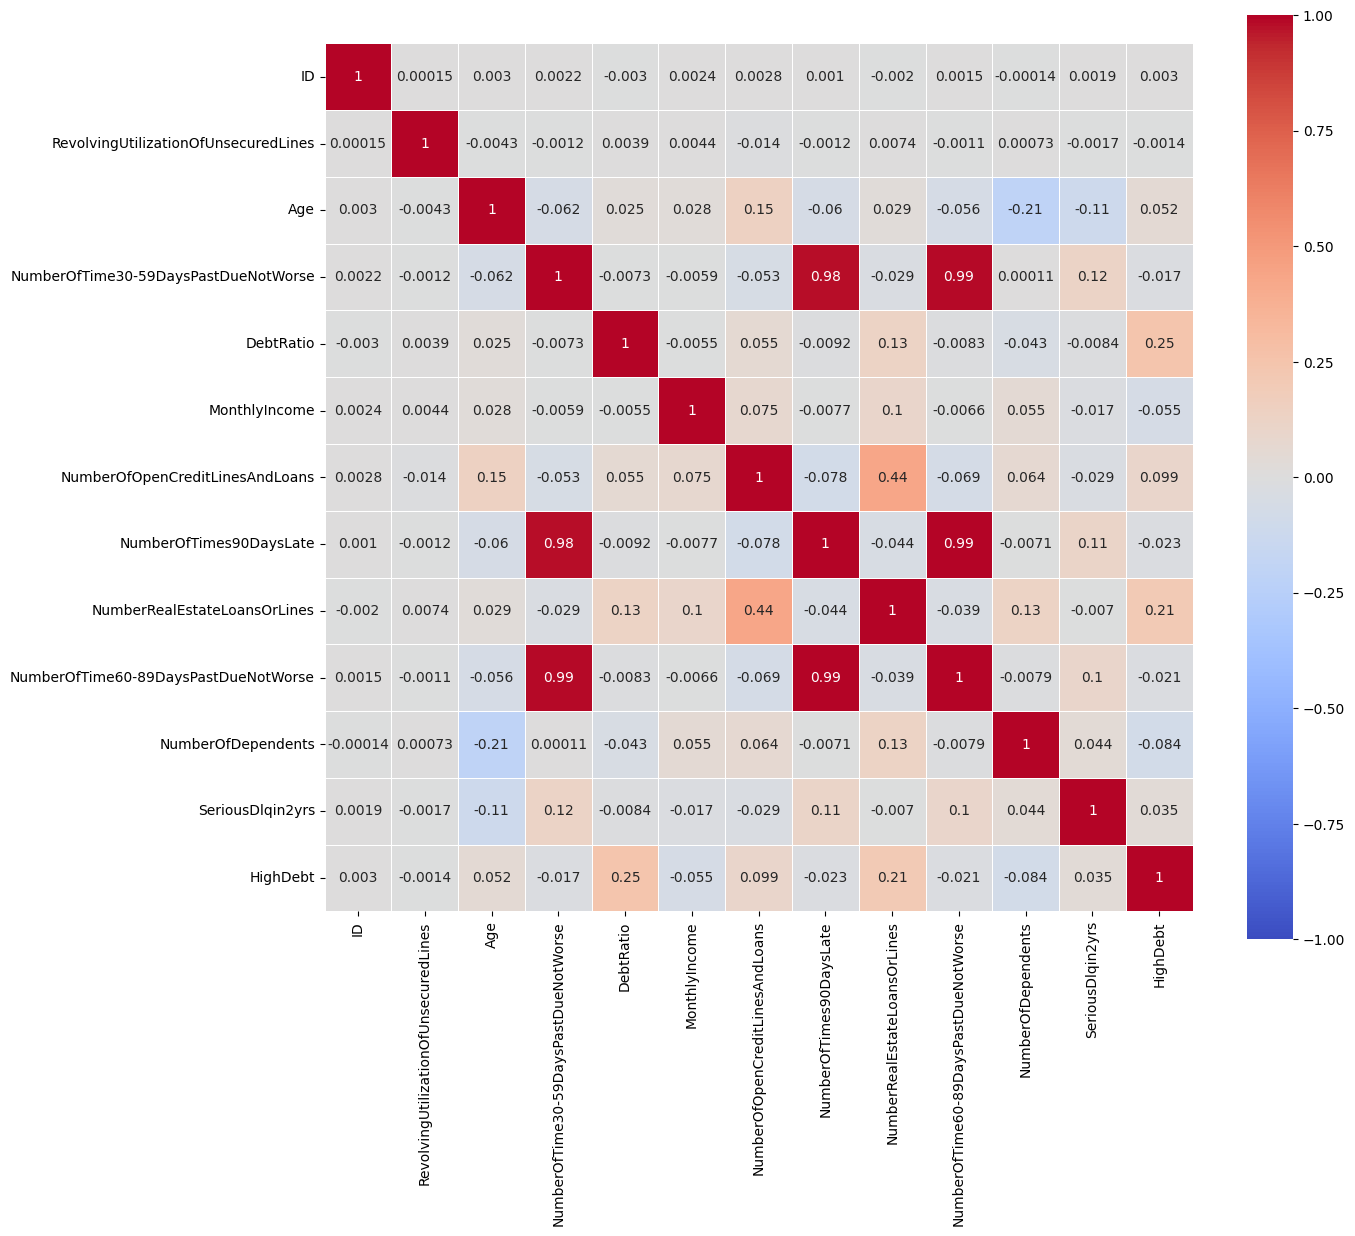

In [259]:
plt.figure(figsize=(14, 12))
sns.heatmap(data.corr(), 
            annot=True,           
            cmap="coolwarm",     
            vmin=-1, vmax=1,      
            square=True,          
            linewidths=0.5)

In [267]:
data

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs,HighDebt,LogMonthlyIncome
0,9580,0.668999,0.384278,2,-0.193160,-0.225736,9,1,1,1,1.0,0,False,-0.255842
1,39755,0.015922,1.264658,0,-0.190111,0.000000,5,0,0,0,0.0,0,True,0.000000
2,118799,0.183062,-0.022051,1,-0.193388,-0.117296,9,0,0,0,0.0,0,False,-0.124766
3,16489,0.162301,1.670987,0,-0.193282,-0.323847,8,0,0,0,0.0,0,False,-0.391336
4,149857,0.404199,-1.511924,0,-0.193393,-0.059255,4,0,0,0,0.0,0,False,-0.061084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,79500,0.842886,-1.308760,0,-0.193307,0.178760,10,0,0,0,1.0,0,False,0.164463
104996,84928,0.805186,1.061494,0,-0.193281,-0.087759,7,0,0,0,0.0,0,False,-0.091852
104997,56301,0.811494,-0.089772,2,-0.191370,-0.253895,26,0,4,0,0.0,1,True,-0.292889
104998,41912,0.412590,0.655164,1,-0.193312,0.513786,7,1,1,0,0.0,0,False,0.414614


In [285]:
data['LogMonthlyIncome'] = np.log1p(data['MonthlyIncome'])
data_test['LogMonthlyIncome'] = np.log1p(data_test['MonthlyIncome'])


<Axes: >

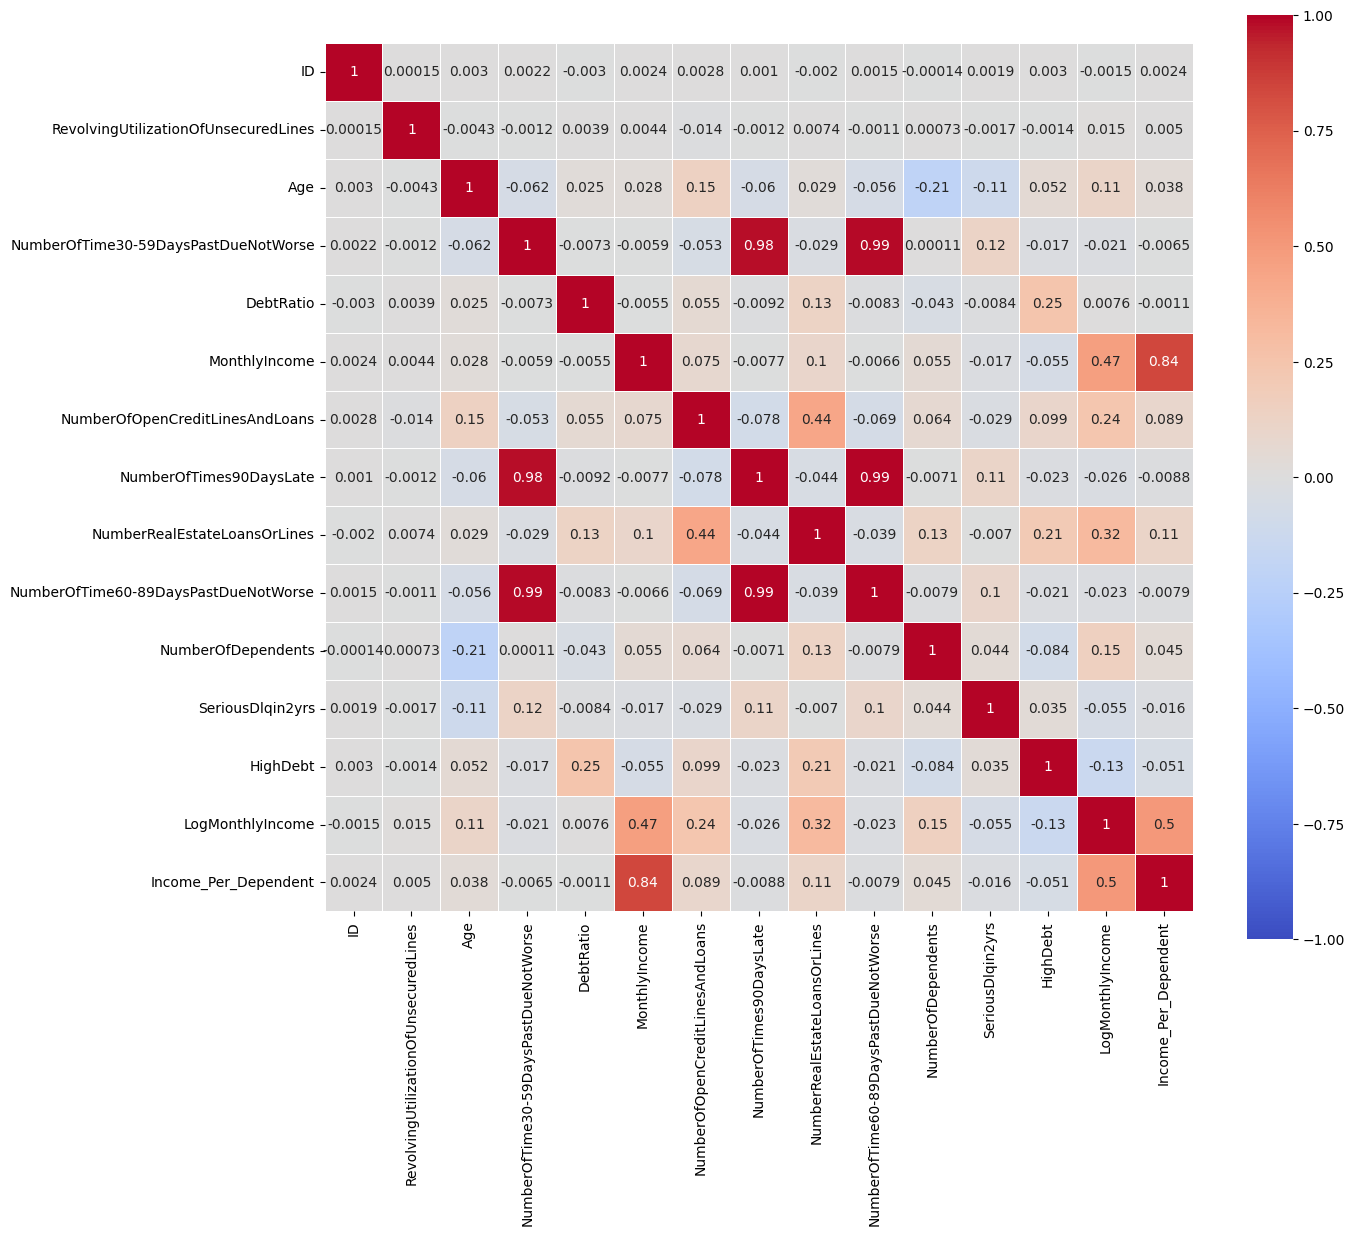

In [286]:
plt.figure(figsize=(14, 12))
sns.heatmap(data.corr(), 
            annot=True,           
            cmap="coolwarm",     
            vmin=-1, vmax=1,      
            square=True,          
            linewidths=0.5)

In [287]:
data

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs,HighDebt,LogMonthlyIncome,Income_Per_Dependent
0,9580,0.668999,0.384278,2,-0.193160,-2.257356e-01,9,1,1,1,1.0,0,False,-2.558418e-01,-1.128678e-01
1,39755,0.015922,1.264658,0,-0.190111,2.909842e-17,5,0,0,0,0.0,0,True,2.909842e-17,2.909842e-17
2,118799,0.183062,-0.022051,1,-0.193388,-1.172963e-01,9,0,0,0,0.0,0,False,-1.247657e-01,-1.172963e-01
3,16489,0.162301,1.670987,0,-0.193282,-3.238473e-01,8,0,0,0,0.0,0,False,-3.913363e-01,-3.238473e-01
4,149857,0.404199,-1.511924,0,-0.193393,-5.925545e-02,4,0,0,0,0.0,0,False,-6.108364e-02,-5.925545e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,79500,0.842886,-1.308760,0,-0.193307,1.787602e-01,10,0,0,0,1.0,0,False,1.644632e-01,8.938008e-02
104996,84928,0.805186,1.061494,0,-0.193281,-8.775949e-02,7,0,0,0,0.0,0,False,-9.185161e-02,-8.775949e-02
104997,56301,0.811494,-0.089772,2,-0.191370,-2.538953e-01,26,0,4,0,0.0,1,True,-2.928894e-01,-2.538953e-01
104998,41912,0.412590,0.655164,1,-0.193312,5.137859e-01,7,1,1,0,0.0,0,False,4.146137e-01,5.137859e-01


In [291]:
scaler = StandardScaler()
scaled_features = ['Age', 'MonthlyIncome', 'DebtRatio', 'Income_Per_Dependent', 'LogMonthlyIncome']
data[scaled_features] = scaler.fit_transform(data[scaled_features])
data_test[scaled_features] = scaler.transform(data_test[scaled_features])

In [292]:
data

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs,HighDebt,LogMonthlyIncome,Income_Per_Dependent
0,9580,0.668999,0.384278,2,-0.193160,-2.257356e-01,9,1,1,1,1.0,0,False,-0.774468,-0.161702
1,39755,0.015922,1.264658,0,-0.190111,3.694822e-17,5,0,0,0,0.0,0,True,0.180910,0.028118
2,118799,0.183062,-0.022051,1,-0.193388,-1.172963e-01,9,0,0,0,0.0,0,False,-0.284997,-0.169150
3,16489,0.162301,1.670987,0,-0.193282,-3.238473e-01,8,0,0,0,0.0,0,False,-1.280438,-0.516525
4,149857,0.404199,-1.511924,0,-0.193393,-5.925545e-02,4,0,0,0,0.0,0,False,-0.047192,-0.071537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,79500,0.842886,-1.308760,0,-0.193307,1.787602e-01,10,0,0,0,1.0,0,False,0.795056,0.178437
104996,84928,0.805186,1.061494,0,-0.193281,-8.775949e-02,7,0,0,0,0.0,0,False,-0.162087,-0.119475
104997,56301,0.811494,-0.089772,2,-0.191370,-2.538953e-01,26,0,4,0,0.0,1,True,-0.912813,-0.398881
104998,41912,0.412590,0.655164,1,-0.193312,5.137859e-01,7,1,1,0,0.0,0,False,1.729181,0.892199


In [293]:
data['Income_Per_Dependent'] = data['MonthlyIncome'] / (data['NumberOfDependents'] + 1)
data_test['Income_Per_Dependent'] = data_test['MonthlyIncome'] / (data_test['NumberOfDependents'] + 1)

# Ultimo Modelo

In [296]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Carga de datos
data = pd.read_csv("../¡EnseñameLaPasta!/train.csv")
data_test = pd.read_csv("../¡EnseñameLaPasta!/test.csv")

# Imputación de valores faltantes
imputer = KNNImputer(n_neighbors=5)
data[['MonthlyIncome', 'NumberOfDependents']] = imputer.fit_transform(data[['MonthlyIncome', 'NumberOfDependents']])
data_test[['MonthlyIncome', 'NumberOfDependents']] = imputer.transform(data_test[['MonthlyIncome', 'NumberOfDependents']])

# Escalado de variables numéricas
scaler = StandardScaler()
data[['Age', 'MonthlyIncome', 'DebtRatio']] = scaler.fit_transform(data[['Age', 'MonthlyIncome', 'DebtRatio']])
data_test[['Age', 'MonthlyIncome', 'DebtRatio']] = scaler.transform(data_test[['Age', 'MonthlyIncome', 'DebtRatio']])

# Feature Engineering adicional
for df in [data, data_test]:
    # Income Features
    df['Income_Per_Dependent'] = df['MonthlyIncome'] / (df['NumberOfDependents'] + 1)
    df['LogMonthlyIncome'] = np.log1p(df['MonthlyIncome'])
    df['Debt_to_Income'] = df['DebtRatio'] * df['MonthlyIncome']
    df['HighDebt'] = df['DebtRatio'] > 0.5
    
    # Age Features
    df['Age_Category'] = pd.cut(df['Age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle-aged', 'Senior'])
    df['Age_Squared'] = df['Age'] ** 2
    df['Age_Decade'] = df['Age'] // 10
    
    # Dependents Features
    df['HasDependents'] = df['NumberOfDependents'] > 0
    df['Debt_Per_Dependent'] = df['DebtRatio'] / (df['NumberOfDependents'] + 1)
    
    # Historial Financiero (si tienes datos adicionales)
    # df['Employment_Stability'] = df['YearsEmployed'] / df['Age']  # Ejemplo si tienes "YearsEmployed"
    # df['Income_Stability'] = df['MonthlyIncome'].rolling(window=3).std()  # Ejemplo si tienes "MonthlyIncome" en el tiempo

# Transformación final de categorías a dummies (si es necesario)
data = pd.get_dummies(data, columns=['Age_Category'], drop_first=True)
data_test = pd.get_dummies(data_test, columns=['Age_Category'], drop_first=True)

print(data.head())
print(data_test.head())


       ID  RevolvingUtilizationOfUnsecuredLines       Age  \
0    9580                              0.668999  0.384278   
1   39755                              0.015922  1.264658   
2  118799                              0.183062 -0.022051   
3   16489                              0.162301  1.670987   
4  149857                              0.404199 -1.511924   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2  -0.193160      -0.192510   
1                                     0  -0.190111      -0.173477   
2                                     1  -0.193388      -0.084370   
3                                     0  -0.193282      -0.290351   
4                                     0  -0.193393      -0.026490   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                                9                        1   
1                                5                        0   
2                            

<Axes: >

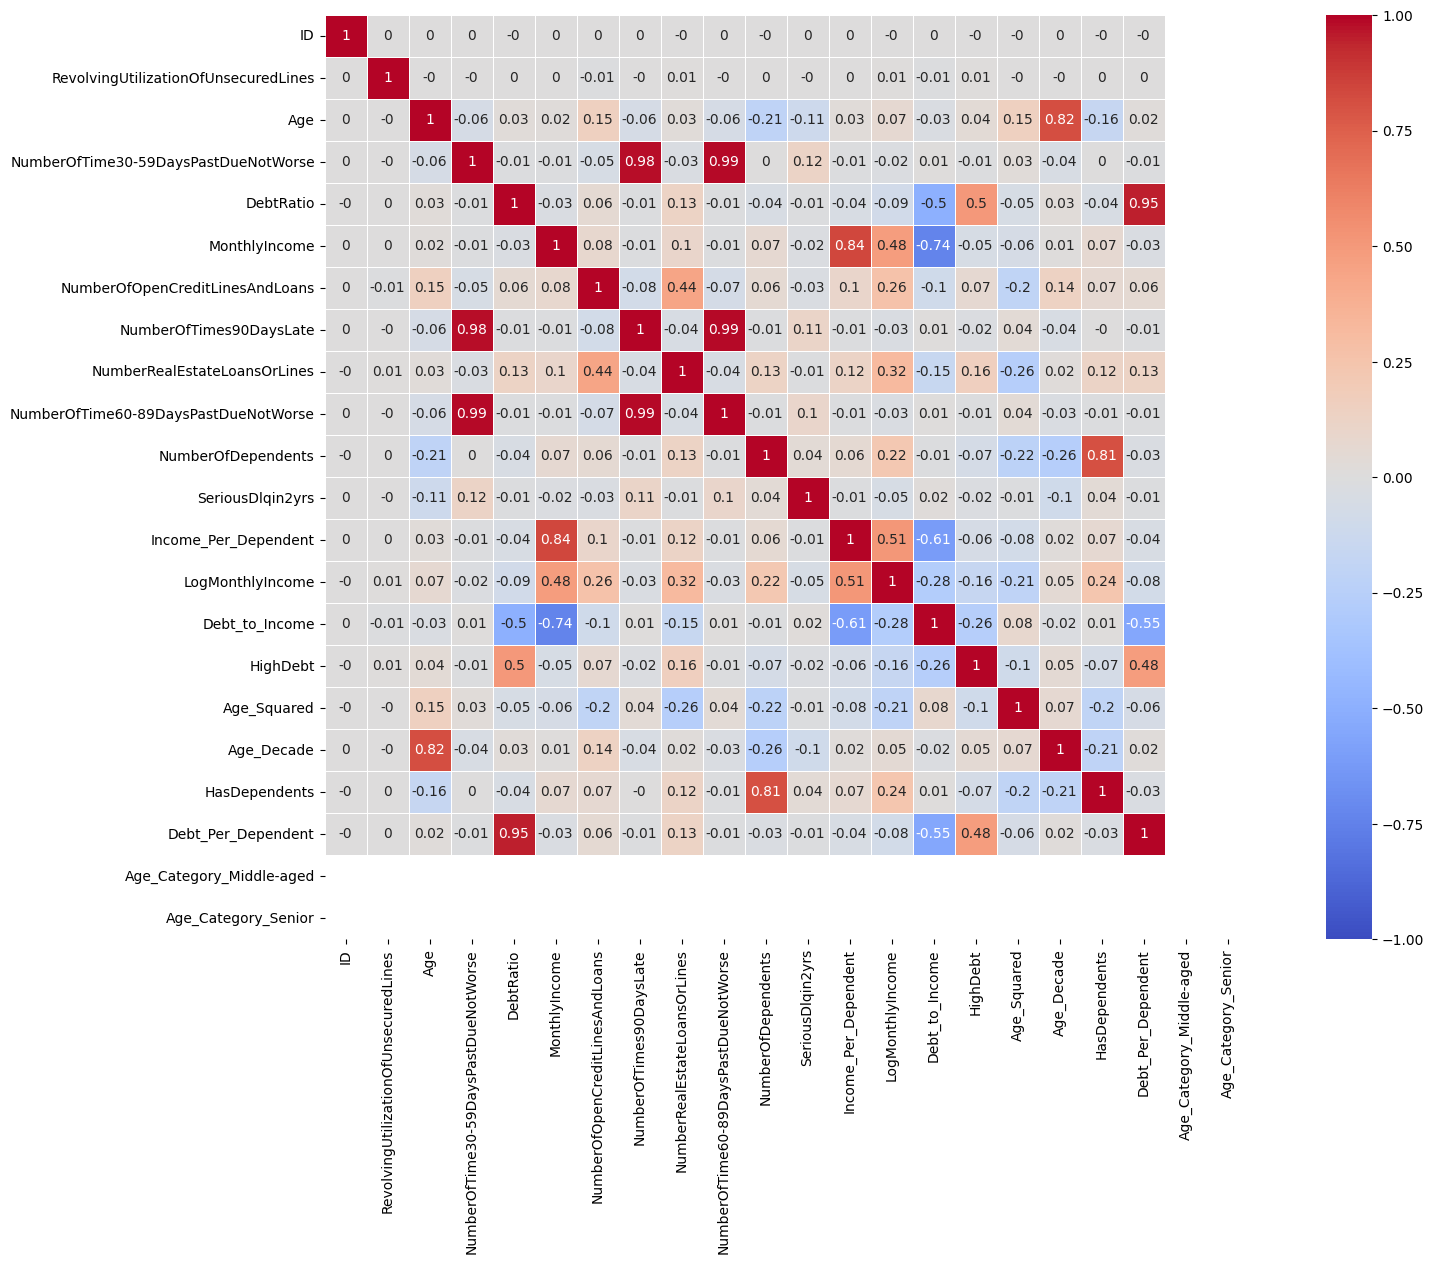

In [299]:
plt.figure(figsize=(20, 12))
sns.heatmap(data.corr().round(2), 
            annot=True,           
            cmap="coolwarm",     
            vmin=-1, vmax=1,      
            square=True,          
            linewidths=0.5)

In [307]:
data_test.columns

Index(['ID', 'RevolvingUtilizationOfUnsecuredLines', 'Age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'Income_Per_Dependent', 'LogMonthlyIncome',
       'Debt_to_Income', 'HighDebt', 'Age_Squared', 'Age_Decade',
       'HasDependents', 'Debt_Per_Dependent', 'Age_Category_Middle-aged',
       'Age_Category_Senior'],
      dtype='object')

In [306]:
data.columns

Index(['ID', 'RevolvingUtilizationOfUnsecuredLines', 'Age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'SeriousDlqin2yrs', 'Income_Per_Dependent',
       'LogMonthlyIncome', 'Debt_to_Income', 'HighDebt', 'Age_Squared',
       'Age_Decade', 'HasDependents', 'Debt_Per_Dependent',
       'Age_Category_Middle-aged', 'Age_Category_Senior'],
      dtype='object')

In [309]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd
from scipy.stats import randint, uniform


X = data.drop(['ID', 'SeriousDlqin2yrs'], axis=1)
y = data['SeriousDlqin2yrs']
X_test = data_test.drop(['ID'], axis=1)

# División de los datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Configuración de hiperparámetros para RandomizedSearchCV ---
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_dist, n_iter=10, scoring='roc_auc', cv=3, random_state=42
)

# --- Ajuste del modelo ---
random_search.fit(X_train, y_train)

# Mejor modelo y evaluación en el conjunto de validación
best_model = random_search.best_estimator_
print("Mejores hiperparámetros:", random_search.best_params_)

# Calcular AUC en el conjunto de validación
y_pred_proba_val = best_model.predict_proba(X_val)[:, 1]
auc_val = roc_auc_score(y_val, y_pred_proba_val)
print(f"AUC en conjunto de validación: {auc_val:.4f}")

# --- Predicciones y Guardado de Resultados en el Conjunto de Prueba ---
y_pred_proba_test = best_model.predict_proba(X_test)[:, 1]
predictions_df = pd.DataFrame({"ID": data_test["ID"], "SeriousDlqin2yrs": y_pred_proba_test})
predictions_df.to_csv('Pruebas/predicciones_features.csv', index=False)


c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:59:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:59:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:59:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 


Mejores hiperparámetros: {'colsample_bytree': np.float64(0.8832290311184181), 'learning_rate': np.float64(0.016175348288740735), 'max_depth': 4, 'min_child_weight': 8, 'n_estimators': 393, 'subsample': np.float64(0.6003115063364057)}
AUC en conjunto de validación: 0.8506


# Regresion Logistica

In [310]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd
from scipy.stats import uniform


X = data.drop(['ID', 'SeriousDlqin2yrs'], axis=1)
y = data['SeriousDlqin2yrs']
X_test_final = data_test.drop(['ID'], axis=1)

# --- Configuración y Entrenamiento del Modelo con RandomizedSearchCV ---
param_dist = {
    'C': uniform(loc=0, scale=4),  # Valor de regularización
    'solver': ['lbfgs', 'liblinear'],  # Algoritmo para optimización
    'penalty': ['l2']  # Regularización l2
}

model = LogisticRegression(max_iter=500)
random_search = RandomizedSearchCV(
    model, 
    param_distributions=param_dist,
    n_iter=10,
    scoring='roc_auc',
    cv=5,
    random_state=42
)

random_search.fit(X, y)

# Obtener el mejor modelo y evaluarlo
print("Mejores hiperparámetros:", random_search.best_params_)
best_model = random_search.best_estimator_

# Cross-validation para obtener el AUC promedio
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='roc_auc')
print(f"AUC CV Score: {cv_scores.mean():.4f}")

# --- Predicciones en el Conjunto de Prueba ---
y_pred_proba_test = best_model.predict_proba(X_test_final)[:, 1]

# Guardado de Predicciones
predictions_df = pd.DataFrame({"ID": data_test["ID"], "SeriousDlqin2yrs": y_pred_proba_test})
predictions_df.to_csv('Pruebas/predicciones_features.csv', index=False)


c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    h

Mejores hiperparámetros: {'C': np.float64(1.3348344445560874), 'penalty': 'l2', 'solver': 'liblinear'}
AUC CV Score: 0.7026
